In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

%matplotlib inline

In [4]:
import datetime

os.chdir('../course-files')
#Import data
nasa = pd.read_csv("nasa_facebook_statuses.csv",
usecols=["status_published","num_reactions",
"num_comments","num_shares","num_likes"])
#Convert column type to date time
nasa["status_published"] = pd.to_datetime(nasa["status_published"])
#Select observations between two datetimes - May 2015
filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
#Add column with day only
nasa['month'] = nasa.apply(lambda row: row["status_published"].month,axis=1)
# nasa['day'] - pd.to_numeric(nasa.day)
#Group all columns by sum
nasa_by_month = nasa.drop('status_published', axis=1).groupby(by='month').sum()
nasa_by_month.head()

,num_reactions,num_comments,num_shares,num_likes
month,,,,
3,3003815,49108,392585,2846361
4,2927616,120118,370803,2760385
5,2708977,46122,393576,2548960


<Axes: ylabel='num_likes'>

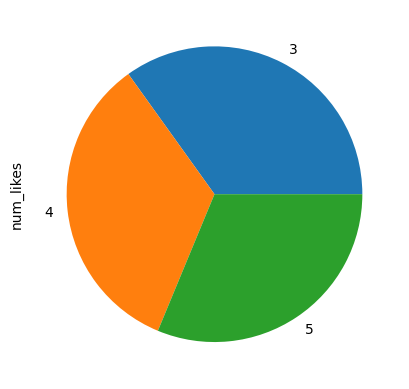

In [6]:
nasa_by_month['num_likes'].plot(kind='pie')

<Axes: title={'center': 'NASA Facebook activities'}, ylabel='num_likes'>

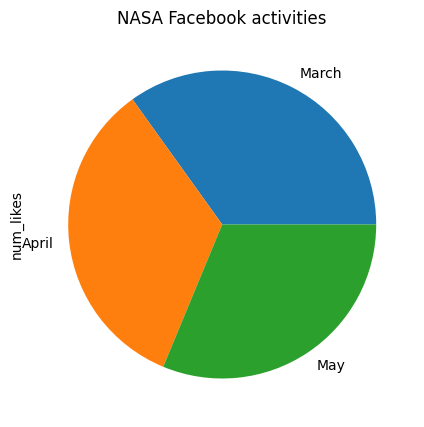

In [12]:
nasa_by_month['num_likes'].plot(kind='pie', title="NASA Facebook activities", figsize=(5,5), labels=['March', 'April', 'May'])

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

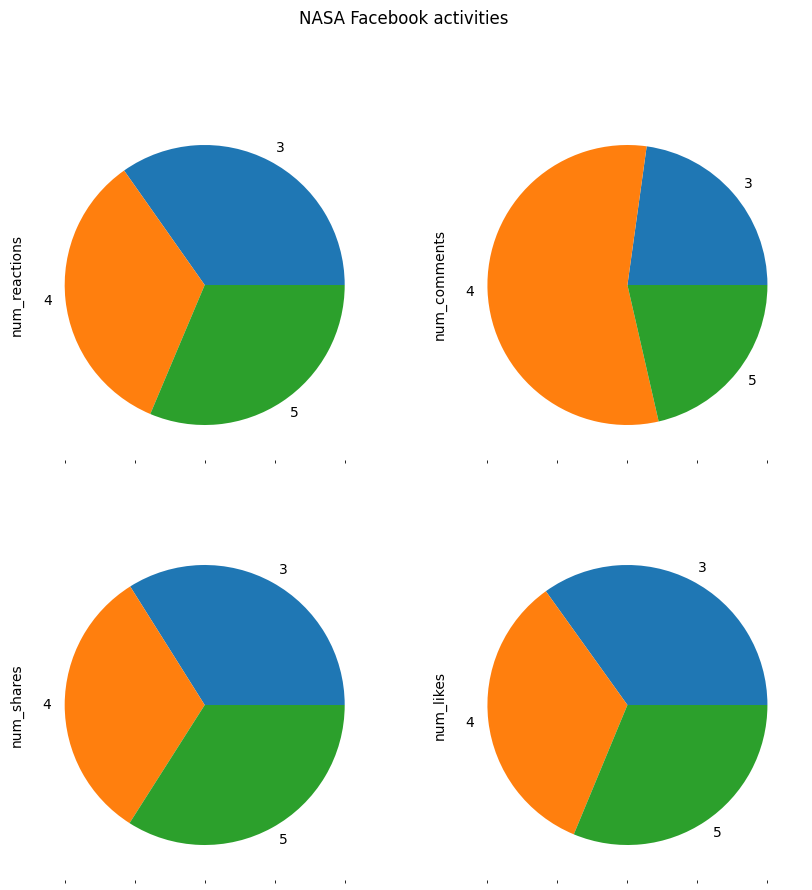

In [13]:
nasa_by_month.plot(kind='pie', title="NASA Facebook activities", figsize=(10,10), subplots=True, layout=(2,2), legend=False)

array([[<Axes: ylabel='num_reactions'>, <Axes: ylabel='num_comments'>],
       [<Axes: ylabel='num_shares'>, <Axes: ylabel='num_likes'>]],
      dtype=object)

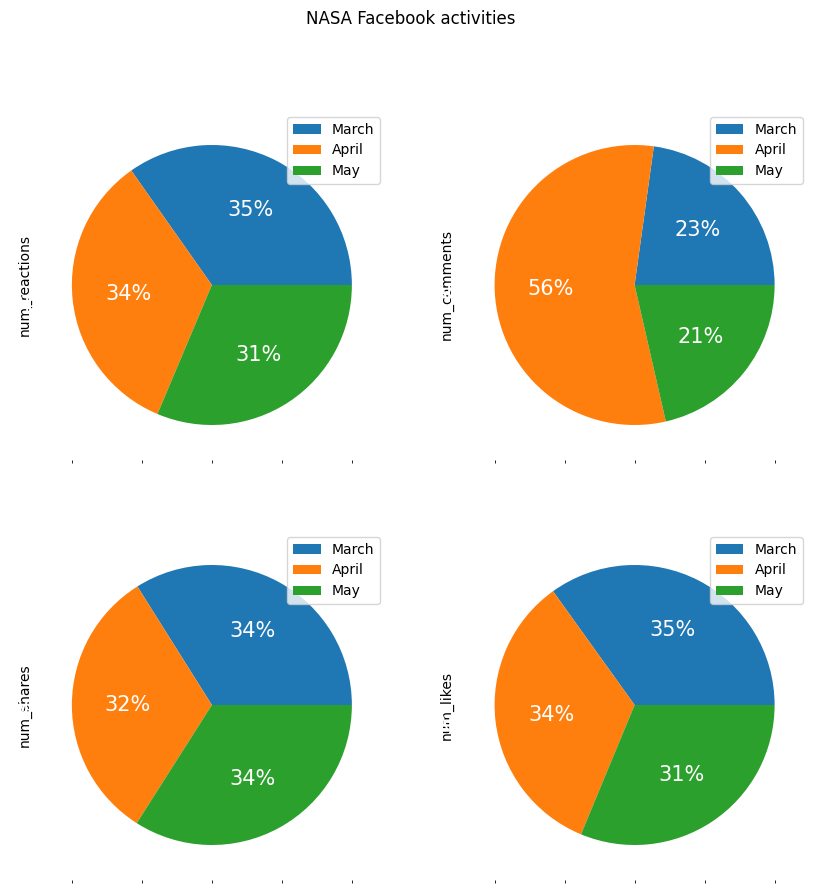

In [15]:
nasa_by_month.plot(kind='pie', title="NASA Facebook activities", figsize=(10,10), subplots=True, layout=(2,2),
                  autopct='%.0f%%', textprops=dict(color='w'), fontsize=15, labels=('March', 'April', 'May'))